# Problema

Implementación de la regresión lineal

## Instrucciones

Generar una implementación correcta de la regresión lineal usando el descenso del gradiente como método de optimización de los pesos y compararlo con la implementación directa de la librería sklearn (los valores de w y b no serán exactamente iguales pero muy similares)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


In [2]:
# Generación del dataset
np.random.seed(0)  # Para reproducibilidad
X = np.random.uniform(1, 10, 5000)  # Generar 5000 valores aleatorios para las horas de estudio
error = np.random.normal(0, 5, 5000)  # Generar errores aleatorios
y = 50 + 5 * X + error  # Generar la puntuación del examen

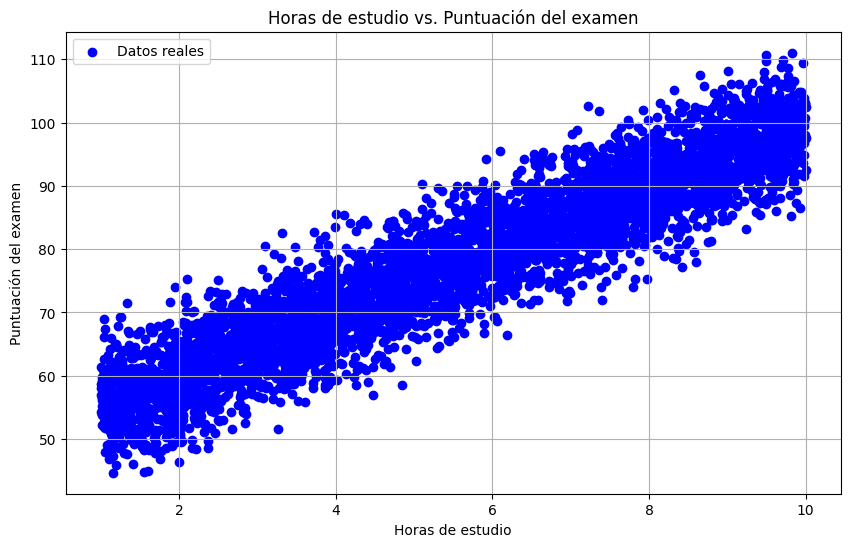

In [3]:
# Visualización de los datos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Dividir los datos en conjuntos de entrenamiento, validación y prueba

# 80 % TRAIN Y VAL 20 % TEST
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

print('Datos de entrenamiento:', X_train.shape[0])
print('Datos de validación:', X_val.shape[0])
print('Datos de test:', X_test.shape[0])


Datos de entrenamiento: 3000
Datos de validación: 1000
Datos de test: 1000


## Implementación manual de la regresión con gradiente descendente

In [8]:
# Función de costo (Mean Squared Error)
def cost_function(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradiente descendente para ajustar los parámetros del modelo
def train_regression(X_train, y_train, X_val, y_val, lr, epochs):
    # Inicializar los coeficientes (pesos) w y b
    w = np.random.randn()
    b = np.random.randn()
    
    train_loss_per_epoch = []
    val_loss_per_epoch = []

    for epoch in range(epochs):
        # Calcular y_pred del conjunto de entrenamiento
        y_pred_train = w * X_train + b
        
        # Calcular las pérdidas de entrenamiento y almacenarlas
        train_loss = cost_function(y_train, y_pred_train)
        train_loss_per_epoch.append(train_loss)
        
        # Calcular los gradientes para los pesos w y b
        error = y_train - y_pred_train
        w_gradient = -2 * np.mean(error * X_train)
        b_gradient = -2 * np.mean(error)
        
        # Actualizar los pesos w y b
        w -= lr * w_gradient
        b -= lr * b_gradient
        
        # Calcular y_pred del conjunto de validación
        y_pred_val = w * X_val + b
        
        # Calcular las pérdidas de validación y almacenarlas
        val_loss = cost_function(y_val, y_pred_val)
        val_loss_per_epoch.append(val_loss)
        
        if epoch % 100 == 0:
            print(f'Epoch {epoch}: train_loss = {train_loss}, val_loss = {val_loss}')

    return w, b, train_loss_per_epoch, val_loss_per_epoch


In [11]:
# Hiperparámetros
lr = 0.01
epochs = 1000

# Entrenar el modelo
w, b, train_loss_per_epoch, val_loss_per_epoch = train_regression(X_train, y_train, X_val, y_val, lr=lr, epochs=epochs)

Epoch 0: train_loss = 6987.060355943623, val_loss = 872.5331322296328
Epoch 100: train_loss = 227.33667399875495, val_loss = 238.69641896445253
Epoch 200: train_loss = 123.30155125743686, val_loss = 131.14046655672894
Epoch 300: train_loss = 72.34803542355324, val_loss = 78.1869778541867
Epoch 400: train_loss = 47.392417480088206, val_loss = 52.05897579160135
Epoch 500: train_loss = 35.16984840417674, val_loss = 39.12723984911022
Epoch 600: train_loss = 29.183573283526087, val_loss = 32.69918047403172
Epoch 700: train_loss = 26.25166186641275, val_loss = 29.48479295428907
Epoch 800: train_loss = 24.81569302359333, val_loss = 27.864214205847748
Epoch 900: train_loss = 24.112395336796762, val_loss = 27.038124572315652


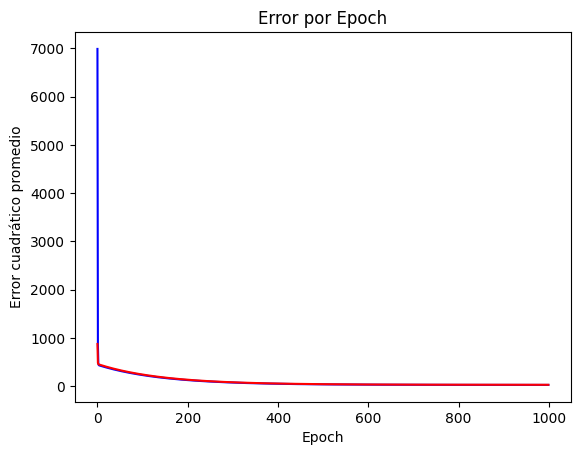

In [12]:
# Visualización del error de entrenamiento por epoch
plt.figure()
plt.plot(range(epochs), train_loss_per_epoch, '-b')
plt.plot(range(epochs), val_loss_per_epoch, '-r')
plt.xlabel('Epoch')
plt.ylabel('Error cuadrático promedio')
plt.title('Error por Epoch')
plt.show()

Costo del modelo: 25.82143145725542


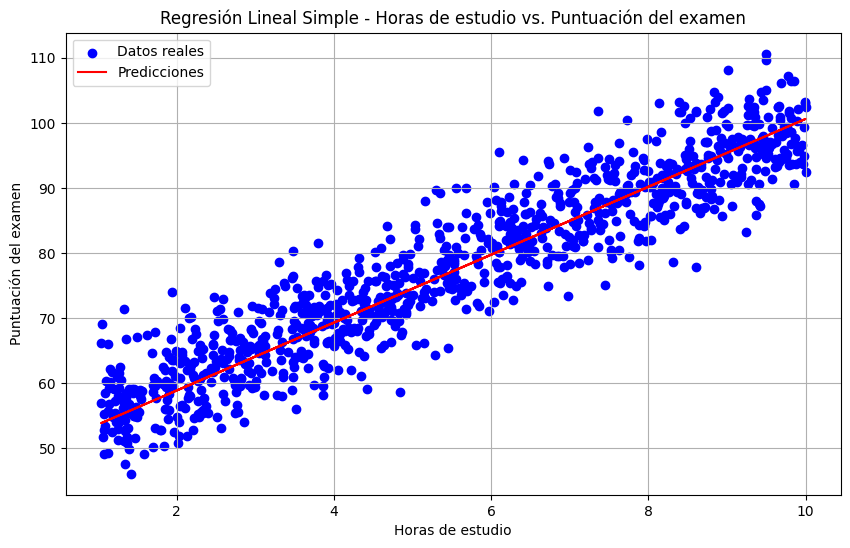

In [16]:
# Realizar predicciones en test
y_pred = w * X_test + b

# Calcular el costo
cost = cost_function(y_test, y_pred)

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Calcular las métricas de evaluación mse, mae, r2 y mape
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("MSE en el conjunto de test:", mse)
print("MAE en el conjunto de test:", mae)
print("R^2 en el conjunto de test:", r2)
print("MAPE en el conjunto de test:", mape)

MSE en el conjunto de test: 25.82143145725542
MAE en el conjunto de test: 4.002212293578271
R^2 en el conjunto de test: 0.8704526897919926
MAPE en el conjunto de test: 0.053004607094058055


## Implementación de la regresión lineal usando sklearn

In [18]:
# Crear el modelo de regresión lineal con sklearn
model_sklearn = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
X_train_reshaped = X_train.reshape(-1, 1)
X_val_reshaped = X_val.reshape(-1, 1)
X_test_reshaped = X_test.reshape(-1, 1)

model_sklearn.fit(X_train_reshaped, y_train)

LinearRegression()

Costo del modelo: 25.249637383330825


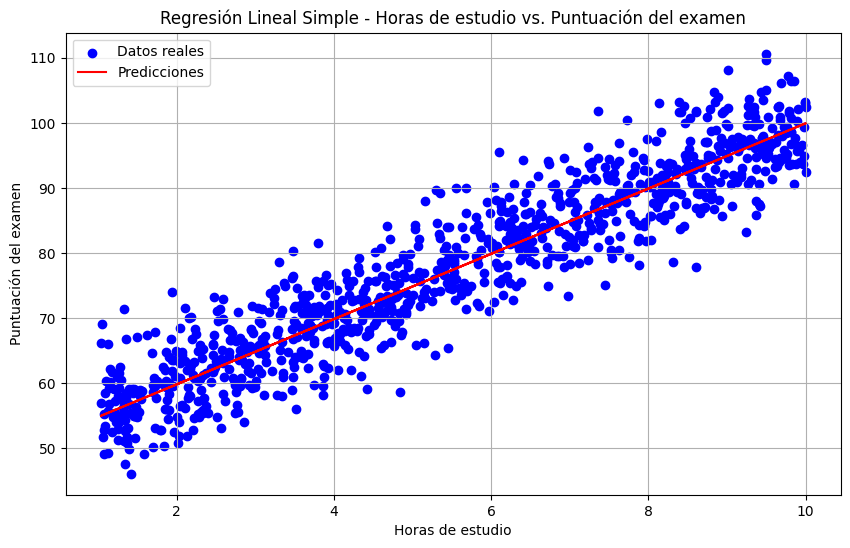

In [20]:
# Realizar predicciones en test
y_pred = model_sklearn.predict(X_test_reshaped)

# Calcular el costo
cost = mean_squared_error(y_test, y_pred)

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Realizar predicciones en el conjunto de entrenamiento
y_pred_train_sklearn = model_sklearn.predict(X_train_reshaped)

# Calcular las métricas de evaluación mse, mae, r2 y mape en el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_pred_train_sklearn)
mae_train = mean_absolute_error(y_train, y_pred_train_sklearn)
r2_train = r2_score(y_train, y_pred_train_sklearn)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train_sklearn)

print("MSE en el conjunto de entrenamiento:", mse_train)
print("MAE en el conjunto de entrenamiento:", mae_train)
print("R^2 en el conjunto de entrenamiento:", r2_train)
print("MAPE en el conjunto de entrenamiento:", mape_train)

MSE en el conjunto de entrenamiento: 23.437293509479936
MAE en el conjunto de entrenamiento: 3.829111436954274
R^2 en el conjunto de entrenamiento: 0.8770641646391161
MAPE en el conjunto de entrenamiento: 0.05150295924253383


## Comparación de parámetros obtenidos

In [26]:
b_sklearn = model_sklearn.intercept_
w_sklearn = model_sklearn.coef_[0]

print("Coeficiente de intercepción (b) - Manual:", b)
print("Coeficiente de pendiente (w) - Manual:", w)
print("Coeficiente de intercepción (b) - Scikit-learn:", b_sklearn)
print("Coeficiente de pendiente (w) - Scikit-learn:", w_sklearn)

Coeficiente de intercepción (b) - Manual: 48.44651483636474
Coeficiente de pendiente (w) - Manual: 5.216632511519652
Coeficiente de intercepción (b) - Scikit-learn: 49.79376934674991
Coeficiente de pendiente (w) - Scikit-learn: 5.01401554246228


* Los coeficientes obtenidos en la implementación manual y scikit-learn, así como el desempeño de ambos modelos (MSE, MAE, R^2 y MAPE) son muy similares.
* Usar una librería como scikit-learn, por tanto, simplifica el proceso y reduce el riesgo de imputar errores manualmente.